## Engineering Workflow Manager Data Exploration
Demonstrates data science application development on IBM Engineering Workflow Manager (EWM, and formerly Rational Team Concert). mkdata.create_projectarea_df() uses the EWM SCM CLI for data access.

Mapping EWM and GitHub:
* EWM ProjectArea -- GitHub Organization
* EWM component -- git repository
* EWM change set -- git commit

In [72]:
# Import required code
import sys;sys.path.append("..")
import importlib
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from devml import (mkdata, stats, state, fetch_repo, ts)
# reload these incase they've changed during developmnet
importlib.reload(mkdata)


<module 'devml.mkdata' from '../devml/mkdata.py'>

In [62]:
# Execute this cell to set your user credentials

import getpass
userId = input("Input your EWM credentials...\nUser ID: ")
password = getpass.getpass()


Input your EWM credentials...
User ID: jamsden@us.ibm.com
········


In [73]:
# Load the developer data from an EWM project area.
# EWM ProjectArea -- GitHub Organization
# EWM component -- git repository
# EWM change set -- git commit
df = mkdata.create_projectarea_df('https://jazzop01.rtp.raleigh.ibm.com:9943/jazz', 'Jazz Collaborative ALM', userId, password)


archive
Autotrans.script
buildTools
conref
features
for_compatibility
help
Messages
Messages_test
mifune
oslc
PDXMLfiles
releng
scripts
templates
Test
testing
tours
translations
transTools
transTools_preIDWB440
tutorials
UAPackaging
UASpecialBuilds
UAWARbuilds


In [74]:
df_author_ud = stats.author_unique_active_days(df)

In [75]:
df_author_ud.head(10)

,author_name,active_days,active_duration,active_ratio
1,Carol Newbold,17,118 days,0.14
3,Guadalajara Build View 01,4,43 days,0.09
5,Jose de Jesus Herrera Ledon,2,1 days,2.00
2,Eric Solomon,1,0 days,inf
4,Guadalajara Build team 1.,1,0 days,inf
6,Patricia Der,1,0 days,inf


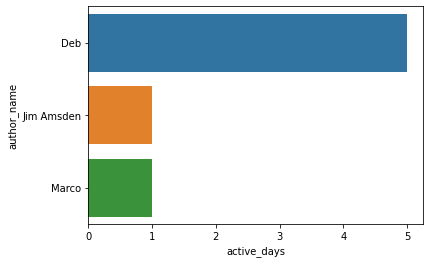

In [51]:
sns.barplot(y="author_name", x="active_days", data=df_author_ud.head(10))

In [55]:
# Create a snapshot of this notebook
# Save the notebook before using nbconvert
from IPython.display import Javascript

script = '''
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});
'''
Javascript(script)

!jupyter nbconvert --no-prompt --no-input --ExtractOutputPreprocessor.enabled=False --TemplateExporter.exclude_input=True ewm_data_exploration.ipynb 2>/dev/null 1>/dev/null

